<a href="https://colab.research.google.com/github/sipocz/Garbage_Classification/blob/main/Garbage_model_usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Build Model
# Importáld a megfelelő rétegeket
from tensorflow.keras.layers import Input,Dense,Embedding,LSTM,TimeDistributed, Flatten, Bidirectional, Conv2D, Dropout,Convolution2D, Conv2DTranspose
from tensorflow.keras.layers import MaxPooling2D, Rescaling,RandomFlip,RandomRotation, Reshape

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adadelta,Adam,SGD
from tensorflow.keras.losses import sparse_categorical_crossentropy,categorical_crossentropy, mean_squared_error
from tensorflow.keras import backend as K
from keras.regularizers import l1
from keras.initializers import RandomNormal,Zeros,GlorotUniform
K.clear_session()

Xmax=64
Ymax=48
bpc=1
flat=Xmax*Ymax*bpc
inputs= Input(shape=(Xmax,Ymax))

ll=RandomNormal()

# Encoder

x = Flatten()(inputs)

x = Dense(350,activation="linear",kernel_initializer=ll)(x)


#x = Dense(10,activation="elu",kernel_initializer='he_uniform')(x)


# Decoder
coded = Dense(151,activation="linear",kernel_initializer=ll, name="coded")(x)


#x = Dense(10,activation="elu",kernel_initializer='he_uniform')(coded)
x = Dense(350,activation="linear",kernel_initializer=ll)(coded)


x = Dense(flat,activation="linear",kernel_initializer=ll)(x)

x = Reshape((Xmax,Ymax,bpc))(x)


#x = Conv2DTranspose(3, (2, 2), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(inputs, x)






In [2]:
modelurl="https://github.com/sipocz/Garbage_Classification/raw/cd7970e9e0423b0ab16db644f08c2408bcc0c19e/models/mod_0_0035.zip"
fname=modelurl.split("/")[-1]
modelname=fname.split(".")[0]+".h5"

In [3]:
modelname

'mod_0_0035.h5'

In [4]:
!wget $modelurl
!unzip $fname
!rm $fname

--2021-10-28 12:29:43--  https://github.com/sipocz/Garbage_Classification/raw/cd7970e9e0423b0ab16db644f08c2408bcc0c19e/models/mod_0_0035.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sipocz/Garbage_Classification/cd7970e9e0423b0ab16db644f08c2408bcc0c19e/models/mod_0_0035.zip [following]
--2021-10-28 12:29:43--  https://raw.githubusercontent.com/sipocz/Garbage_Classification/cd7970e9e0423b0ab16db644f08c2408bcc0c19e/models/mod_0_0035.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24747746 (24M) [application/zip]
Saving to: ‘mod_0_0035.zip’

mod_0_0035.zip      100%[===================>]

In [5]:
from keras.models import load_model
autoencoder=load_model(modelname)

In [6]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 48)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 350)               1075550   
_________________________________________________________________
coded (Dense)                (None, 151)               53001     
_________________________________________________________________
dense_1 (Dense)              (None, 350)               53200     
_________________________________________________________________
dense_2 (Dense)              (None, 3072)              1078272   
_________________________________________________________________
reshape (Reshape)            (None, 64, 48, 1)         0     

In [7]:
import tensorflow as tf
layer_coded=tf.keras.models.Model(inputs=autoencoder.inputs,outputs=autoencoder.get_layer(name="coded").output)


In [8]:
fnames={
        'cardboard':'https://github.com/sipocz/Garbage_Classification/raw/da6122a92fa291b0c80bd290dae6b339a6c8dfda/cardboard.zip',
        'glass':'https://github.com/sipocz/Garbage_Classification/raw/da6122a92fa291b0c80bd290dae6b339a6c8dfda/glass.zip',
        'metal':'https://github.com/sipocz/Garbage_Classification/raw/da6122a92fa291b0c80bd290dae6b339a6c8dfda/metal.zip',
        'paper':'https://github.com/sipocz/Garbage_Classification/raw/da6122a92fa291b0c80bd290dae6b339a6c8dfda/paper.zip',
        'plastic':'https://github.com/sipocz/Garbage_Classification/raw/da6122a92fa291b0c80bd290dae6b339a6c8dfda/plastic.zip',
        'trash':'https://github.com/sipocz/Garbage_Classification/raw/zip/trash.zip'
}


In [9]:
def create_dir(fnames):
    for key in fnames:
        !mkdir graf
        dirname="./graf/"+key
        !mkdir $dirname
        allfile=dirname+"/*"
        !rm $allfile
        fname_url_tmp=fnames[key]
        fname=key+".zip"
        !wget $fname_url_tmp
        !cp $fname $dirname 
        
        !rm $fname
        zipname=dirname+"/"+key+".zip"
        print("dirname:",dirname)
        !unzip $zipname -d "./graf"
        #!rm $zipname  

In [10]:
create_dir(fnames)

rm: cannot remove './graf/cardboard/*': No such file or directory
--2021-10-28 12:29:45--  https://github.com/sipocz/Garbage_Classification/raw/da6122a92fa291b0c80bd290dae6b339a6c8dfda/cardboard.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sipocz/Garbage_Classification/da6122a92fa291b0c80bd290dae6b339a6c8dfda/cardboard.zip [following]
--2021-10-28 12:29:45--  https://raw.githubusercontent.com/sipocz/Garbage_Classification/da6122a92fa291b0c80bd290dae6b339a6c8dfda/cardboard.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6093838 (5.8M) [application/zip]
Saving to: ‘cardboard.zip’

cardb

In [11]:
def format_image(image_dir):
    image = tf.io.read_file(image_dir)
    image = tf.image.decode_jpeg(image, channels=1)
    #image = tf.image.convert_image_dtype(image,dtype=tf.int16)
    
    image = tf.image.resize_with_pad(image, 48, 64,)

    #print(image)
    return image

In [123]:
f1="./graf/metal/010.jpg"

In [124]:
imagex=format_image(f1)

In [125]:
imagex=tf.image.rot90(imagex)

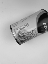

In [126]:

from google.colab.patches import cv2_imshow
cv2_imshow(imagex.numpy())

In [127]:
ii=imagex.numpy()

In [128]:
ii=ii.reshape(-1,64,48)

In [129]:
ii.shape

(1, 64, 48)

In [130]:
oo=autoencoder.predict(ii)

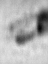

In [131]:
cv2_imshow(oo[0])

In [132]:
avektor=autoencoder.get_layer("coded").output

In [133]:
klayer=autoencoder.get_layer(name="coded")

In [134]:
p1=klayer.variables[1].numpy()

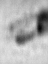

In [135]:
cv2_imshow(oo[0])

In [136]:
import numpy as np


In [137]:
np.linalg.norm(p1)

0.6605025

In [138]:
def cos_sim(a,b):
    from numpy import dot
    from numpy.linalg import norm

    cos_sim_calc = dot(a, b)/(norm(a)*norm(b))
    return(cos_sim_calc)

In [176]:
def embed_vector(fname):
    from google.colab.patches import cv2_imshow
    
    imagex=format_image(fname)
    imagex=tf.image.rot90(imagex)
    
    cv2_imshow(imagex.numpy())
    ii=imagex.numpy()
    ii=ii.reshape(-1,64,48)
    ii.shape
    oo=autoencoder.predict(ii)
    cv2_imshow(oo[0])
    klayer=autoencoder.get_layer(name="coded")
    p1=klayer.variables[1].numpy()
    print(klayer.variables)
    return(p1)

In [222]:
def embed_vector(fname):

    from keras.models import Model

    model = autoencoder  # include here your original model

    layer_name = 'coded'
    intermediate_layer_model = Model(inputs=model.input,
                                    outputs=model.get_layer(layer_name).output)
    
    imagex=format_image(fname)
    imagex=tf.image.rot90(imagex)
    
    cv2_imshow(imagex.numpy())
    ii=imagex.numpy()
    ii=ii.reshape(-1,64,48)
    ii.shape
    intermediate_output = intermediate_layer_model.predict(ii)
    return(intermediate_output)

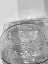

In [235]:
f1="./graf/glass/003.jpg"
v1=embed_vector(f1)

In [224]:
v1

array([[ 1.33777695e+01,  4.41408253e+00,  7.40366058e+01,
        -8.94529724e+01,  2.70078015e+00,  7.91652374e+01,
         1.63834998e+03,  5.84358826e+01,  8.43614960e+01,
        -4.87451897e+01,  2.58660450e+01,  1.25056360e+03,
         4.13684034e+00, -2.48536499e+02,  3.82735176e+01,
        -5.38435287e+01,  1.46290169e+01,  1.26984703e+02,
         5.12007904e+01,  1.47617111e+01, -5.56689491e+01,
        -7.31843114e-01,  2.49227352e+01,  4.68865013e+01,
        -1.58849001e+01,  8.15387344e+00,  7.66246719e+01,
         8.76041107e+01,  5.18927803e+01, -9.70474091e+01,
         4.46184448e+02,  8.37289963e+01,  1.22404320e+02,
        -1.42878052e+02,  6.08956795e+01, -9.43422604e+00,
         2.15477448e+02,  1.96158409e+01, -4.45140877e+01,
         8.73106079e+01, -3.36896820e+01, -2.61911416e+00,
        -9.92452240e+01, -1.20189880e+03,  4.14220238e+01,
         3.65958061e+01,  4.80543804e+00,  9.79745712e+01,
         1.30693741e+01,  6.21731148e+01, -1.26955467e+0

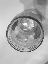

In [237]:
f1="./graf/glass/006.jpg"
v2=embed_vector(f1)

In [238]:
v2

array([[-9.71996994e+01,  1.80267181e+01, -2.16252213e+01,
        -2.42282410e+01,  1.30190353e+02, -9.45560760e+01,
         1.70057642e+03, -5.68700867e+01, -7.14435120e+01,
         1.30121170e+02, -3.62482452e+01,  1.43499219e+03,
        -1.04435028e+02,  2.12998337e+02, -6.59699097e+01,
         4.18109283e+01, -3.44571953e+01,  3.73292885e+01,
         1.22698112e+02, -9.24286118e+01, -1.96803253e+02,
         1.32243073e+02, -1.27631779e+01, -1.85731064e+02,
        -9.34818420e+01,  5.24380684e+01, -1.72404617e+02,
         4.91547966e+01, -3.91868401e+01, -1.93757801e+01,
         2.54015244e+02,  5.45255699e+01, -1.64252213e+02,
        -3.65328598e+01, -1.92265823e+02, -2.73988419e+01,
        -9.71088104e+01,  8.08278809e+01,  1.75359177e+02,
        -3.96700630e+01,  1.25374651e+01, -1.06367561e+02,
        -2.02536575e+02, -1.12880664e+03,  7.55549850e+01,
         9.07365570e+01,  3.73710418e+00, -1.98067093e+00,
        -1.26626816e+02,  4.88265724e+01, -7.49315948e+0

In [239]:
a=cos_sim(v1[0],v2[0])

In [240]:
print(a)

0.835147


In [166]:
v1

array([-0.01617388, -0.04074385,  0.02647804, -0.06356775,  0.05527239,
       -0.01664942, -0.20480323, -0.00746086,  0.07918337,  0.02122765,
        0.02949703, -0.2061132 ,  0.04168667, -0.19079429,  0.02170891,
        0.0077674 , -0.00056115, -0.02153743, -0.01416178,  0.03729251,
        0.07988276, -0.02868762,  0.04306616,  0.01999498,  0.01501746,
       -0.02019855, -0.05602204,  0.06326584, -0.04122707, -0.03196999,
       -0.07851347, -0.00726858,  0.02565725,  0.04341713, -0.0117612 ,
        0.00438786, -0.0553862 , -0.00039095, -0.06515244,  0.03493994,
       -0.02323468, -0.03110135, -0.00574584,  0.18121706, -0.0306898 ,
        0.04795525,  0.03168374, -0.02562335,  0.0479435 , -0.04110156,
       -0.01000586, -0.00739306,  0.01633358,  0.00530232,  0.01445385,
        0.01962786,  0.00916066,  0.01131901, -0.06797021,  0.03030384,
       -0.0086622 ,  0.00786075,  0.02263473, -0.02868537,  0.03332118,
        0.02495165,  0.02574619, -0.01091522,  0.01272115, -0.17

In [167]:
v2

array([-0.01617388, -0.04074385,  0.02647804, -0.06356775,  0.05527239,
       -0.01664942, -0.20480323, -0.00746086,  0.07918337,  0.02122765,
        0.02949703, -0.2061132 ,  0.04168667, -0.19079429,  0.02170891,
        0.0077674 , -0.00056115, -0.02153743, -0.01416178,  0.03729251,
        0.07988276, -0.02868762,  0.04306616,  0.01999498,  0.01501746,
       -0.02019855, -0.05602204,  0.06326584, -0.04122707, -0.03196999,
       -0.07851347, -0.00726858,  0.02565725,  0.04341713, -0.0117612 ,
        0.00438786, -0.0553862 , -0.00039095, -0.06515244,  0.03493994,
       -0.02323468, -0.03110135, -0.00574584,  0.18121706, -0.0306898 ,
        0.04795525,  0.03168374, -0.02562335,  0.0479435 , -0.04110156,
       -0.01000586, -0.00739306,  0.01633358,  0.00530232,  0.01445385,
        0.01962786,  0.00916066,  0.01131901, -0.06797021,  0.03030384,
       -0.0086622 ,  0.00786075,  0.02263473, -0.02868537,  0.03332118,
        0.02495165,  0.02574619, -0.01091522,  0.01272115, -0.17

In [243]:
def getsimilarity(fname1,fname2):
    v1=embed_vector(fname1)
    v2=embed_vector(fname2)
    sim=cos_sim(v1[0],v2[0])
    return (sim)
    

In [272]:
def files_of_dir(path):
    import os

   

    files = os.listdir(path)
    out=[path+"/"+file for file in files if "jpg" in file ]
    return out


In [ ]:
files_of_dir("./graf/glass")

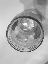

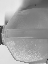

0.8670481

In [263]:
f1="./graf/glass/006.jpg"
f2="./graf/plastic/004.jpg"

getsimilarity(f1,f2)

In [297]:
def get_dir_similarity(dir,fname,rate=0.8):
    fnamelist=files_of_dir(dir)
    count=0
    simsum=0
    maxsim=0
    for dirfname in fnamelist:
        similar=getsimilarity(dirfname,fname)
        print(similar)
        if similar>0.75 and similar!=1:
            count+=1
            simsum=simsum+similar
            if similar>maxsim:
                maxsim=similar
            print(dirfname)
    return(count,maxsim,simsum,simsum/count)


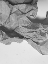

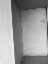

0.66702557


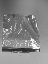

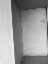

0.67618906


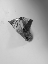

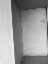

0.7307563


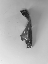

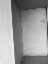

0.7222318


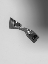

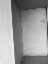

0.7170319


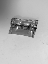

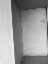

0.7067243


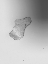

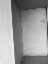

0.80181605
./graf/trash/081.jpg


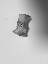

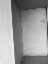

0.74912393


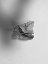

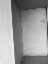

0.6862552


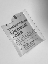

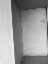

0.77204263
./graf/trash/047.jpg


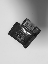

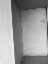

0.6630386


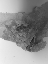

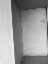

0.62441164


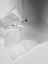

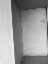

0.8010208
./graf/trash/049.jpg


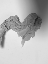

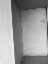

0.71381265


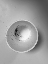

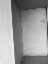

0.76866907
./graf/trash/003.jpg


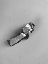

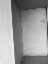

0.7252032


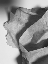

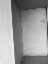

0.6087684


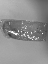

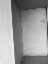

0.7440831


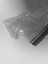

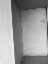

0.73799616


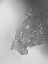

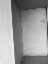

0.7519668
./graf/trash/036.jpg


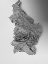

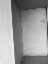

0.73914605


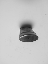

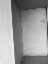

0.70481884


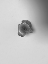

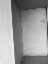

0.7587128
./graf/trash/041.jpg


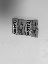

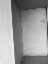

0.71674037


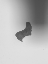

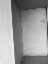

0.7718275
./graf/trash/079.jpg


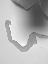

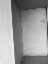

0.77500993
./graf/trash/048.jpg


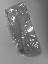

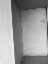

0.7551977
./graf/trash/085.jpg


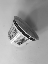

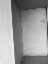

0.7453154


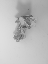

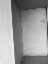

0.8166079
./graf/trash/026.jpg


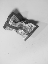

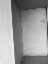

0.73045796


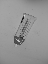

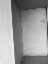

0.80484307
./graf/trash/035.jpg


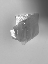

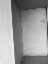

0.7575764
./graf/trash/076.jpg


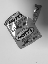

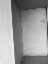

0.69399315


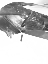

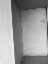

0.6346597


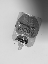

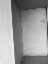

0.715914


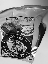

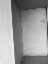

0.4775682


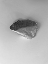

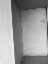

0.7552594
./graf/trash/050.jpg


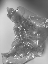

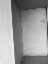

0.72627634


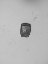

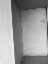

0.7683341
./graf/trash/040.jpg


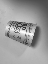

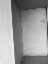

0.7496143


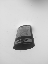

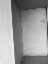

0.69003767


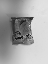

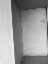

0.6315155


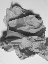

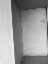

0.5257823


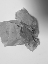

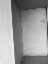

0.6904999


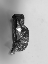

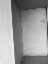

0.60324913


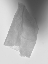

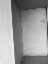

0.81934303
./graf/trash/052.jpg


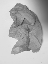

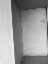

0.74939626


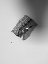

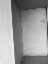

0.7484515


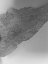

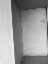

0.6936441


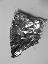

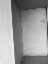

0.6285218


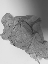

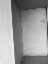

0.6408242


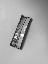

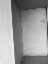

0.7501868
./graf/trash/001.jpg


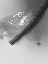

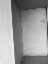

0.6962571


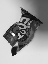

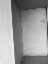

0.5706763


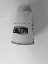

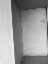

0.76336116
./graf/trash/027.jpg


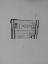

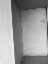

0.79124224
./graf/trash/018.jpg


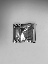

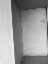

0.73920256


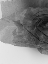

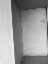

0.60093623


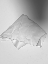

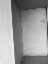

0.8098627
./graf/trash/028.jpg


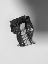

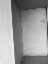

0.69026494


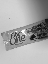

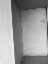

0.66763395


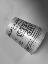

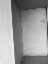

0.7082003


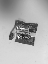

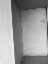

0.68802094


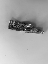

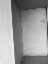

0.75282973
./graf/trash/071.jpg


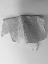

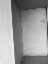

0.7567838
./graf/trash/005.jpg


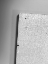

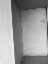

0.7047615


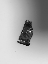

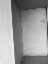

0.67966133


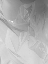

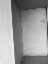

0.82977283
./graf/trash/025.jpg


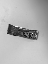

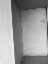

0.7153001


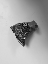

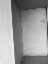

0.70757407


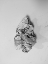

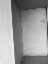

0.7460711


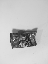

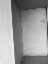

0.6839087


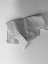

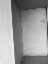

0.7763857
./graf/trash/044.jpg


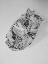

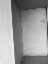

0.74528635


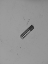

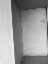

0.7787788
./graf/trash/077.jpg


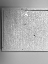

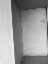

0.6991392


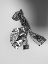

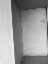

0.69585985


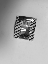

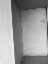

0.6726072


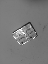

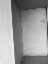

0.7723581
./graf/trash/037.jpg


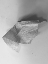

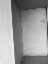

0.76526934
./graf/trash/023.jpg


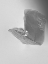

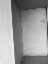

0.7315263


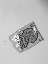

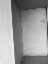

0.7265656


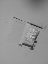

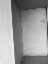

0.79637164
./graf/trash/039.jpg


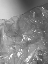

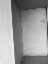

0.8067679
./graf/trash/051.jpg


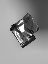

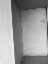

0.6834173


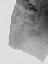

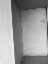

0.7708383
./graf/trash/069.jpg


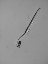

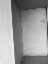

0.7924955
./graf/trash/010.jpg


(30, 0.82977283, 23.391531705856323, 0.7797177235285441)

In [298]:
get_dir_similarity("./graf/trash","./graf/cardboard/002.jpg")